In [1]:
import sys
from urllib.request import urlopen as uReq
from urllib import request
import numpy as np
import scipy as sp
import requests
import time
import smtplib
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Open/extract table of TOIs
df = pd.read_csv('https://exofop.ipac.caltech.edu/tess/download_toi.php?sort=toi&output=csv')

#Remove some columns that do not seem relevant for manipulation to make table easier to read
columns_i_want = ['TIC ID', 'TOI',
       'TESS Mag', 'RA',
       'Dec', 'PM RA (mas/yr)', 'PM Dec (mas/yr)','Epoch (BJD)',
       'Period (days)', 'Duration (hours)', 'Depth (mmag)',
       'Depth (ppm)', 'Planet Radius (R_Earth)', 'Planet Insolation (Earth Flux)',
       'Planet Equil Temp (K)', 'Planet SNR', 'Stellar Distance (pc)', 'Stellar Eff Temp (K)',
        'Stellar log(g) (cm/s^2)', 'Stellar Radius (R_Sun)', 'Stellar Metallicity']
df_c = df.loc[:,columns_i_want]
df_c

,TIC ID,TOI,TESS Mag,RA,Dec,PM RA (mas/yr),PM Dec (mas/yr),Epoch (BJD),Period (days),Duration (hours),...,Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Planet SNR,Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun),Stellar Metallicity
0,231663901,101.01,12.40690,21:14:56.88,-55:52:18.71,12.641,-16.011,2.458326e+06,1.430401,1.638765,...,20452.531250,1.314501e+01,1193.379517,1499.044067,0.887868,375.3100,5600.000000,4.48851,0.860000,NaN
1,149603524,102.01,9.71090,05:48:33.56,-63:59:17.98,-15.641,26.046,2.458326e+06,4.411943,3.776425,...,13979.925781,1.539724e+01,586.130005,1370.000000,474.380951,175.6310,6280.000000,4.32092,1.280000,0.240000
2,336732616,103.01,11.52320,20:49:49.8,-24:25:43.3,10.426,15.620,2.458327e+06,3.547854,3.494333,...,10424.372070,1.458184e+01,1212.004395,1504.859009,0.800299,411.2110,6351.000000,4.22896,1.400000,NaN
3,231670397,104.01,9.86380,21:19:47.93,-58:08:56.16,10.552,-10.658,2.458328e+06,4.087445,5.590140,...,3586.197021,1.265210e+01,1672.217529,1630.958618,0.808662,316.6780,6036.000000,3.93359,2.070000,NaN
4,144065872,105.01,9.49950,22:29:49.88,-48:00:11.16,91.976,-6.861,2.458327e+06,2.184659,2.869426,...,11836.691406,1.251459e+01,985.883728,1429.144653,0.886027,137.5440,5630.000000,4.37759,1.130000,NaN
5,38846515,106.01,10.31570,04:35:50.36,-64:01:37.34,10.845,-0.499,2.458327e+06,2.849380,3.776111,...,7452.432617,9.061380e+00,1311.385376,1534.801880,278.009491,364.4110,6900.000000,4.43800,1.000000,NaN
6,92352620,107.01,9.64330,20:55:07.98,-34:08:08.7,26.376,-44.947,2.458328e+06,3.950054,4.557506,...,12999.897461,1.877557e+01,1098.209595,1468.219727,0.860200,211.2110,6153.000000,4.18077,1.620000,0.220000
7,289793076,108.01,13.16300,21:07:50.76,-26:05:48.19,3.479,-10.313,2.458328e+06,3.043839,2.660993,...,24143.222656,1.399950e+01,400.955292,1141.284058,0.820267,421.8550,5523.000000,4.52192,0.890000,NaN
8,29344935,109.01,13.23660,20:52:51.71,-25:41:14.55,1.053,-9.881,2.458326e+06,2.766737,2.568721,...,15691.951172,1.166177e+01,NaN,NaN,0.834164,513.0110,5346.000000,4.48823,0.930000,NaN
9,281459670,110.01,11.67140,00:22:28.45,-59:56:33.32,-22.309,-4.893,2.458328e+06,3.174305,2.723339,...,15603.693359,1.366880e+01,662.491028,1293.941772,100.352081,342.1400,5943.000000,4.42524,1.060000,-0.100000


In [3]:
#Coefficients for Seff equation
#Coefficients go in order of: recent venus, runaway greenhouse, maximum greenhouse, early mars, runaway greenhouse (5x earth mass), runaway greenhouse (.1x earth mass)
seffsun  = [1.776,1.107, 0.356, 0.320, 1.188, 0.99] 
a = [2.136e-4, 1.332e-4, 6.171e-5, 5.547e-5, 1.433e-4, 1.209e-4]
b = [2.533e-8, 1.580e-8, 1.698e-9, 1.526e-9, 1.707e-8, 1.404e-8]
c = [-1.332e-11, -8.308e-12, -3.198e-12, -2.874e-12, -8.968e-12, -7.418e-12]
d = [-3.097e-15, -1.931e-15, -5.575e-16, -5.011e-16, -2.084e-15, -1.713e-15]

In [4]:
#Remove objects with no Stellar temp or stellar radius (necessary in HZ calc)
df_c_refined = df_c[df_c['Stellar Eff Temp (K)'].notnull()]
df_c_refined2 = df_c_refined[df_c_refined['Stellar Radius (R_Sun)'].notnull()]
df_c_refined2

,TIC ID,TOI,TESS Mag,RA,Dec,PM RA (mas/yr),PM Dec (mas/yr),Epoch (BJD),Period (days),Duration (hours),...,Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Planet SNR,Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun),Stellar Metallicity
0,231663901,101.01,12.40690,21:14:56.88,-55:52:18.71,12.641,-16.011,2.458326e+06,1.430401,1.638765,...,20452.531250,1.314501e+01,1193.379517,1499.044067,0.887868,375.3100,5600.000000,4.48851,0.860000,NaN
1,149603524,102.01,9.71090,05:48:33.56,-63:59:17.98,-15.641,26.046,2.458326e+06,4.411943,3.776425,...,13979.925781,1.539724e+01,586.130005,1370.000000,474.380951,175.6310,6280.000000,4.32092,1.280000,0.240000
2,336732616,103.01,11.52320,20:49:49.8,-24:25:43.3,10.426,15.620,2.458327e+06,3.547854,3.494333,...,10424.372070,1.458184e+01,1212.004395,1504.859009,0.800299,411.2110,6351.000000,4.22896,1.400000,NaN
3,231670397,104.01,9.86380,21:19:47.93,-58:08:56.16,10.552,-10.658,2.458328e+06,4.087445,5.590140,...,3586.197021,1.265210e+01,1672.217529,1630.958618,0.808662,316.6780,6036.000000,3.93359,2.070000,NaN
4,144065872,105.01,9.49950,22:29:49.88,-48:00:11.16,91.976,-6.861,2.458327e+06,2.184659,2.869426,...,11836.691406,1.251459e+01,985.883728,1429.144653,0.886027,137.5440,5630.000000,4.37759,1.130000,NaN
5,38846515,106.01,10.31570,04:35:50.36,-64:01:37.34,10.845,-0.499,2.458327e+06,2.849380,3.776111,...,7452.432617,9.061380e+00,1311.385376,1534.801880,278.009491,364.4110,6900.000000,4.43800,1.000000,NaN
6,92352620,107.01,9.64330,20:55:07.98,-34:08:08.7,26.376,-44.947,2.458328e+06,3.950054,4.557506,...,12999.897461,1.877557e+01,1098.209595,1468.219727,0.860200,211.2110,6153.000000,4.18077,1.620000,0.220000
7,289793076,108.01,13.16300,21:07:50.76,-26:05:48.19,3.479,-10.313,2.458328e+06,3.043839,2.660993,...,24143.222656,1.399950e+01,400.955292,1141.284058,0.820267,421.8550,5523.000000,4.52192,0.890000,NaN
8,29344935,109.01,13.23660,20:52:51.71,-25:41:14.55,1.053,-9.881,2.458326e+06,2.766737,2.568721,...,15691.951172,1.166177e+01,NaN,NaN,0.834164,513.0110,5346.000000,4.48823,0.930000,NaN
9,281459670,110.01,11.67140,00:22:28.45,-59:56:33.32,-22.309,-4.893,2.458328e+06,3.174305,2.723339,...,15603.693359,1.366880e+01,662.491028,1293.941772,100.352081,342.1400,5943.000000,4.42524,1.060000,-0.100000


In [5]:
#Add columns for value of star Temp (stellar eff temp - 5780) and Luminosity (stellar rad squared * rel stellar temp **4)
#Some relative luminosity is very small (practially 0) which screws up some calculations. Apply constraint?
df_c_refined2["T_star"] = pd.Series(df_c_refined2.loc[:,'Stellar Eff Temp (K)'].astype(float))-5780
df_c_refined2["Luminosity"] = pd.Series((df_c_refined2.loc[:,'Stellar Radius (R_Sun)'].astype(float))**2)\
*pd.Series(df_c_refined2.loc[:,'Stellar Eff Temp (K)'].astype(float)/5780)**4

#Add different Kopparapu Hzs using each set of coefficients (need to figure out which coefficients work for which objects)
df_c_refined2['hz_rv'] = ((pd.Series(df_c_refined2.loc[:,'Luminosity'].astype(float)))/(seffsun[0] + pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*a[0] + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*b[0])**2 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*c[0])**3 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*d[0])**4))**.5
df_c_refined2['hz_rg_1x'] = ((pd.Series(df_c_refined2.loc[:,'Luminosity'].astype(float)))/(seffsun[1] + pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*a[1] + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*b[1])**2 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*c[1])**3 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*d[1])**4))**.5
df_c_refined2['hz_mg'] = ((pd.Series(df_c_refined2.loc[:,'Luminosity'].astype(float)))/(seffsun[2] + pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*a[2] + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*b[2])**2 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*c[2])**3 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*d[2])**4))**.5
df_c_refined2['hz_em'] = ((pd.Series(df_c_refined2.loc[:,'Luminosity'].astype(float)))/(seffsun[3] + pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*a[3] + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*b[3])**2 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*c[3])**3 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*d[3])**4))**.5
df_c_refined2['hz_rg_5x'] = ((pd.Series(df_c_refined2.loc[:,'Luminosity'].astype(float)))/(seffsun[4] + pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*a[4] + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*b[4])**2 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*c[4])**3 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*d[4])**4))**.5
df_c_refined2['hz_rg_.1x'] = ((pd.Series(df_c_refined2.loc[:,'Luminosity'].astype(float)))/(seffsun[5] + pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*a[5] + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*b[5])**2 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*c[5])**3 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(float))*d[5])**4))**.5




/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [6]:
#Table with all values
df_c_refined2

#create separate tables for each set of coefficients - easier for graphing later
#Only using a few values for now to graph in next section
df_rv = df_c_refined2.loc[:,['Planet Radius (R_Earth)','Stellar Eff Temp (K)', 'Stellar Radius (R_Sun)', 'hz_rv']]
df_rg_1x = df_c_refined2.loc[:,['Planet Radius (R_Earth)','Stellar Eff Temp (K)', 'Stellar Radius (R_Sun)', 'hz_rg_1x']]
df_mg = df_c_refined2.loc[:,['Planet Radius (R_Earth)','Stellar Eff Temp (K)', 'Stellar Radius (R_Sun)', 'hz_mg']]
df_em = df_c_refined2.loc[:,['Planet Radius (R_Earth)','Stellar Eff Temp (K)', 'Stellar Radius (R_Sun)', 'hz_em']]
df_rg_5x = df_c_refined2.loc[:,['Planet Radius (R_Earth)','Stellar Eff Temp (K)', 'Stellar Radius (R_Sun)', 'hz_rg_5x']]
df_rg_point1x = df_c_refined2.loc[:,['Planet Radius (R_Earth)','Stellar Eff Temp (K)', 'Stellar Radius (R_Sun)', 'hz_rg_.1x']]



In [9]:
#Make Sets of each column to easily graph

#For each HZ set of coefficients, need to remove TOIs that have a 0 as HZ distance - comes from bad Luminosity calc
df_rv_nonzero = df_rv[df_rv['hz_rv']>.01]
df_rg_1x_nonzero = df_rg_1x[df_rg_1x['hz_rg_1x']>.01]
df_mg_nonzero = df_mg[df_mg['hz_mg']>.01]
df_em_nonzero = df_em[df_em['hz_em']>.01]
df_rg_5x_nonzero = df_rg_5x[df_rg_5x['hz_rg_5x']>.01]
df_rg_point1x_nonzero = df_rg_point1x[df_rg_point1x['hz_rg_.1x']>.01]


#Turn each set into a series to graph (only put recent venus here as example - can easily be extended to all)
stellar_rad_rv_index = df_rv_nonzero.set_index('Stellar Radius (R_Sun)')
stellar_rad_rv_list = stellar_rad_rv_index.index.tolist()

planet_rad_rv_index = df_rv_nonzero.set_index('Planet Radius (R_Earth)')
planet_rad_rv_list = planet_rad_rv_index.index.tolist()

stellar_temp_rv_index = df_rv_nonzero.set_index('Stellar Eff Temp (K)')
stellar_temp_rv_list = stellar_temp_rv_index.index.tolist()

hz_rv_index = df_rv_nonzero.set_index('hz_rv')
hz_rv_list = hz_rv_index.index.tolist()

Text(0, 0.5, 'HZ in AU')

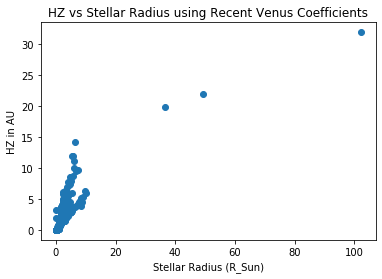

In [10]:
#Graph hz vs stellar radius for recent venus
plt.scatter(stellar_rad_rv_list,hz_rv_list)
plt.title('HZ vs Stellar Radius using Recent Venus Coefficients')
plt.xlabel('Stellar Radius (R_Sun)')
plt.ylabel('HZ in AU')

Text(0, 0.5, 'HZ in AU')

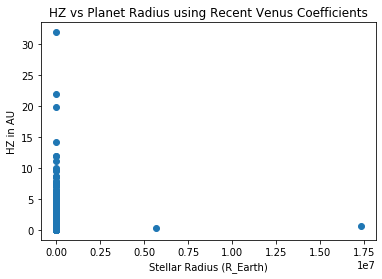

In [11]:
#Graph hz vs planet radius for recent venus
plt.scatter(planet_rad_rv_list,hz_rv_list)
plt.title('HZ vs Planet Radius using Recent Venus Coefficients')
plt.xlabel('Stellar Radius (R_Earth)')
plt.ylabel('HZ in AU')

Text(0, 0.5, 'HZ in AU')

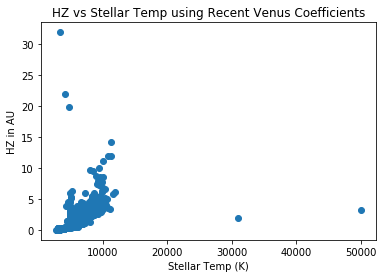

In [12]:
#Graph hz vs stellar temp for recent venus
plt.scatter(stellar_temp_rv_list,hz_rv_list)
plt.title('HZ vs Stellar Temp using Recent Venus Coefficients')
plt.xlabel('Stellar Temp (K)')
plt.ylabel('HZ in AU')

In [24]:
#CHECKING IF THE OBJECTS ARE WITHIN THEIR RANGE OF HZs

#Need to import mass values from other source
#import astroquery.mast catalogs
from astroquery.mast import Catalogs

#Make list of TIC IDs to pull from the catalog
TICID_list = (df_c_refined2['TIC ID']).tolist()

#pull the data for the TIC ID's that are also in EXOFOP
catalog_data = Catalogs.query_criteria(catalog='Tic',objType='STAR', ID = TICID_list)

#Turn it into panda df
catalog_data_df = catalog_data.to_pandas()

#Only pull the masses and IDs since that's all I need
catalog_data_df2 = catalog_data_df[['ID','mass']]

#Add column 'TIC ID' which is equal to 'ID' to join with EXOFOP which indexes using 'TIC ID'
catalog_data_df2["TIC ID"] = catalog_data_df2["ID"].astype(int)

#Rename 'mass' column to 'stellar mass' to be more clear
catalog_data_df2 = catalog_data_df2.rename(columns={'mass': 'Stellar Mass'})

#Join the two dataframes by the TIC ID columns
df_with_masses = df_c_refined2.join(catalog_data_df2.set_index('TIC ID'), on='TIC ID')

#Apply Kepler's third law to see orbital distance (OD) for each TOI
G = 6.67408*(10**(-11))
df_with_masses['Period (seconds)'] = (pd.Series(df_with_masses.loc[:,'Period (days)'].astype(float))*86400)
df_with_masses['Orbital Distance'] = ((((pd.Series(df_with_masses.loc[:,'Period (seconds)'].astype(float)))**2)*(G)*(pd.Series(df_with_masses.loc[:,'Stellar Mass'].astype(float))))/((4)*(np.pi**2)))**(1/3)

#Check if Orbital Distance within Hz ranges (recent venus is min, early mars is max)
#df_rv_nonzero = df_rv[df_rv['hz_rv']>.01]
df_past_min = df_with_masses[df_with_masses['Orbital Distance']>df_with_masses['hz_rv']]
df_within_hz = df_past_min[df_past_min['Orbital Distance']<df_past_min['hz_em']]

#Table of all TOIs within their HZ range
df_within_hz

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,TIC ID,TOI,TESS Mag,RA,Dec,PM RA (mas/yr),PM Dec (mas/yr),Epoch (BJD),Period (days),Duration (hours),...,hz_rv,hz_rg_1x,hz_mg,hz_em,hz_rg_5x,hz_rg_.1x,ID,Stellar Mass,Period (seconds),Orbital Distance
18,278683844,119.01,9.27890,06:36:57.22,-58:00:58.15,51.497,-205.600,2.458328e+06,5.541143,3.034710,...,0.544733,0.689981,1.232273,1.299742,0.666091,0.729925,278683844,0.860000,4.787548e+05,0.693296
19,278683844,119.02,9.27890,06:36:57.22,-58:00:58.15,51.497,-205.600,2.458328e+06,10.691632,3.177466,...,0.544733,0.689981,1.232273,1.299742,0.666091,0.729925,278683844,0.860000,9.237570e+05,1.074522
21,207081058,121.01,9.93580,22:07:28.2,-41:48:55.84,49.561,-9.678,2.458336e+06,14.775056,5.449073,...,0.992676,1.257338,2.201806,2.322357,1.213670,1.329246,207081058,1.140000,1.276565e+06,1.464448
25,52368076,125.01,10.19850,01:34:22.42,-66:40:34.86,-119.800,-122.953,2.458327e+06,4.653811,2.921928,...,0.557955,0.706732,1.269231,1.338723,0.682282,0.747782,52368076,0.910000,4.020893e+05,0.628887
26,52368076,125.02,10.19850,01:34:22.42,-66:40:34.86,-119.800,-122.953,2.458334e+06,9.150607,2.907668,...,0.557955,0.706732,1.269231,1.338723,0.682282,0.747782,52368076,0.910000,7.906124e+05,0.987037
29,234523599,127.01,14.12660,01:02:12.45,-61:45:22.08,78.858,-27.095,2.458326e+06,3.795609,2.042805,...,0.311056,0.394027,0.764665,0.806533,0.380543,0.417896,234523599,0.441590,3.279406e+05,0.431400
32,263003176,130.01,7.43710,00:50:11.23,-83:44:37.56,139.424,30.476,2.458337e+06,14.339928,4.674277,...,0.987963,1.251361,2.178773,2.298063,1.207861,1.322664,263003176,1.230000,1.238970e+06,1.472378
36,234994474,134.01,9.22978,23:20:06.86,-60:03:56.63,-319.961,-127.781,2.458326e+06,1.401461,1.264937,...,0.221608,0.280714,0.533272,0.562470,0.271081,0.297537,234994474,0.585640,1.210862e+05,0.243941
38,410153553,136.01,11.92380,22:41:59.09,-69:10:19.59,334.357,-726.974,2.458326e+06,0.462910,0.520794,...,0.045454,0.057580,0.114700,0.120981,0.055616,0.061112,410153553,0.157909,3.999542e+04,0.075304
39,176957796,137.01,10.70200,06:45:11.4,-66:14:17.98,18.528,-67.531,2.458327e+06,4.819018,3.035372,...,0.448553,0.568168,1.038515,1.095376,0.548563,0.601510,176957796,0.740000,4.163632e+05,0.600808
